### MNE Python EEG Analysis Tutorial

In [1]:
# imports 
import mne
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
# to be able to use the graphical user interface apply this magic
%matplotlib notebook

In [ ]:
%gui qt

Impedance example
<div>
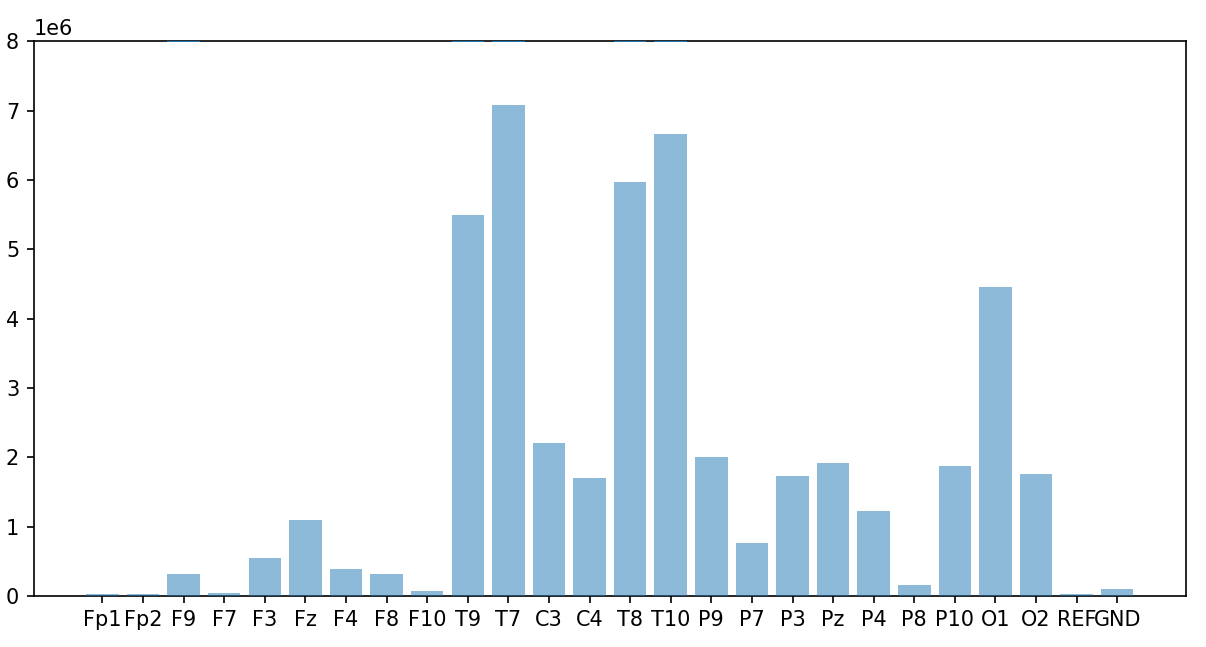
</div>

### Load Data

In [19]:
import mne

# Set the logging level to warning or higher to reduce output
mne.set_log_level('ERROR')

# Optionally, reset to default afterwards
#mne.set_log_level('INFO')

In [38]:
fdir = 'Experiment/output_data/'
fname = 'Jiachen_Test_2024-02-21_11-16-58.vhdr'
raw = mne.io.read_raw_brainvision(fdir+fname)

# Details über die Elektroden und den Aplifier
events, description = mne.events_from_annotations(raw)

In [37]:
raw.annotations

<Annotations | 9 segments: Marker/Impedance (6), New Segment/ (3)>

In [45]:
print(events)
print(description)

[[     0      0  99999]
 [151661      0  10001]
 [151661      0  10001]
 [151664      0  99999]
 [155514      0  10001]
 [155514      0  10001]
 [155517      0  99999]
 [316394      0  10001]
 [316394      0  10001]]
{'Marker/Impedance': 10001, 'New Segment/': 99999}


In [54]:
# get only the "new segment" events
segment_events = events[events[:,2] == description['New Segment/']]
raw_passive = raw.copy().crop(tmin=segment_events[0,0] / raw.info['sfreq'], 
                              tmax=segment_events[2,0] / raw.info['sfreq'])
raw_active = raw.copy().crop(tmin=segment_events[-1,0] / raw.info['sfreq'])



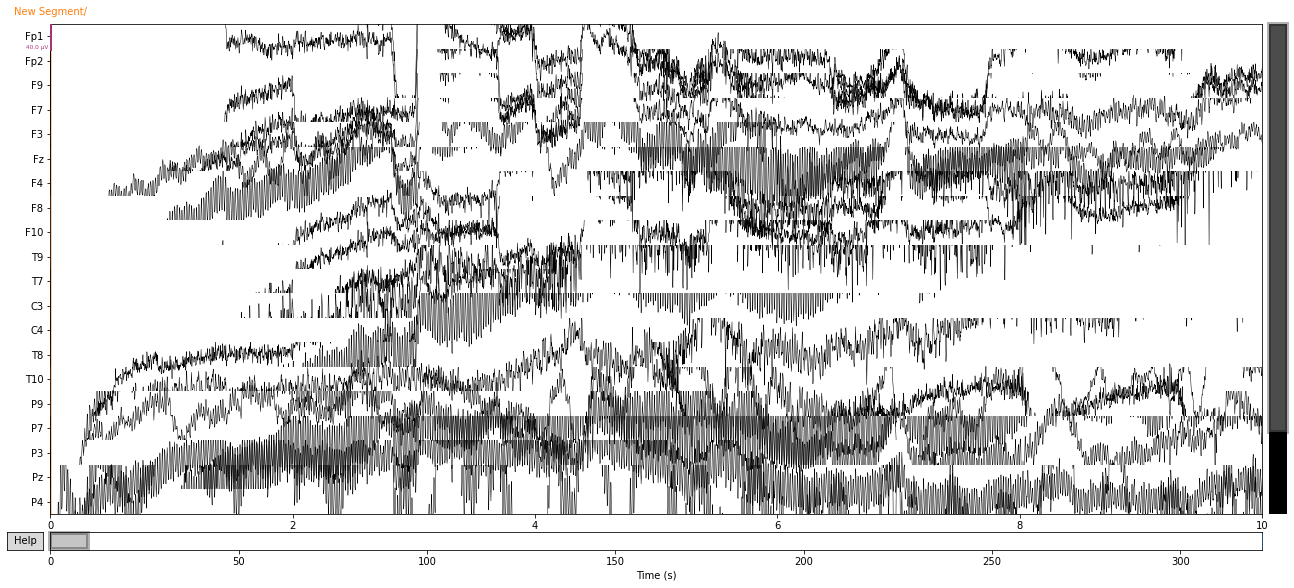

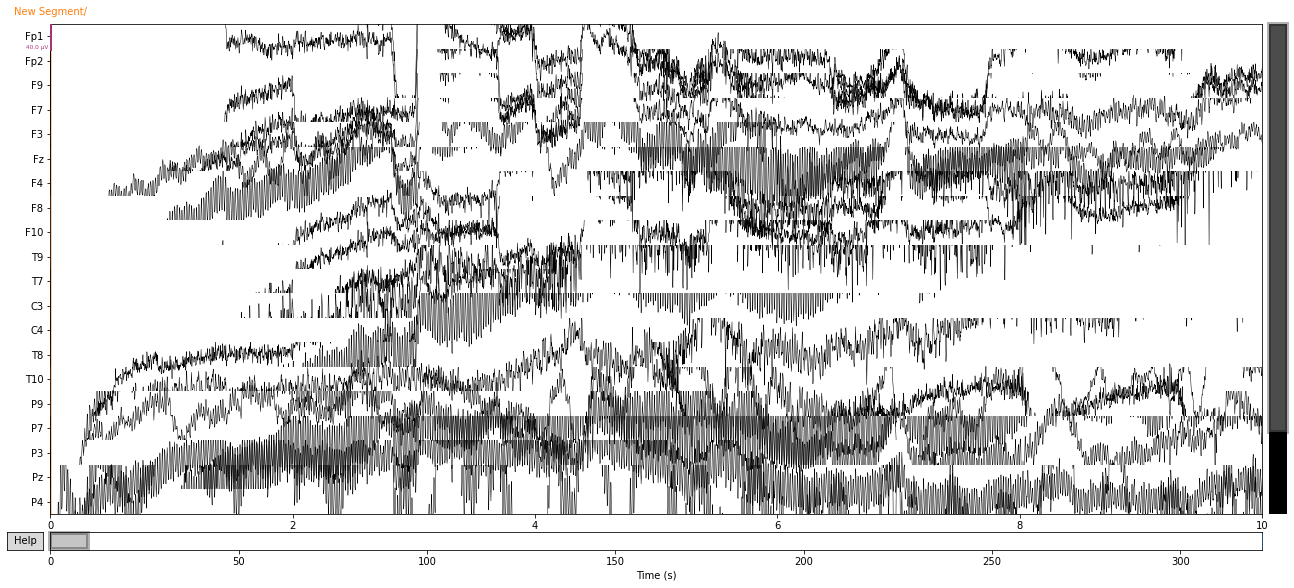

In [56]:
raw_active.plot()

In [44]:
epochs = mne.Epochs(raw, events, event_id=description, event_repeated=True)

ValueError: Invalid value for the 'event_repeated' parameter. Allowed values are 'error', 'drop', and 'merge', but got True instead.

C:\Users\gross\AppData\Roaming\Python\Python39\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


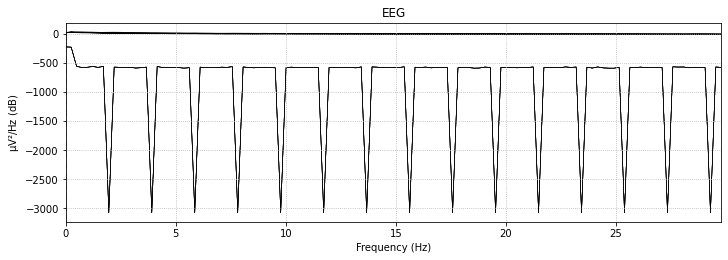

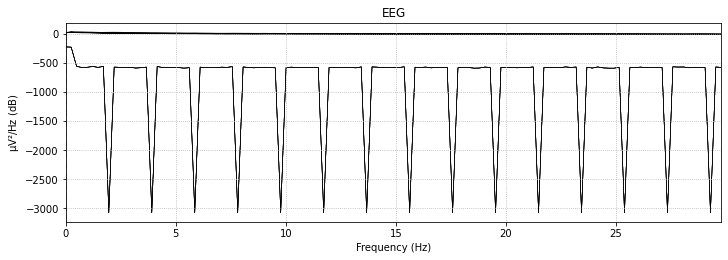

In [26]:
#raw.plot(scalings=1e-1)
mne.set_log_level('CRITICAL', False)
raw.plot_psd(0,30)
#raw.plot(duration=3, n_channels=5, scalings=1e-1)
#plt.show()

In [5]:
# check if standard montag is set
if raw.info['dig'] is not None:
    print("Montage is set.")
else:
    print("Montage is not set.")

Montage is set.


In [6]:
# it is not so I use the standard one:
montage = mne.channels.make_standard_montage('standard_1020')
raw.info.set_montage(montage)

<Info | 9 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F9, F7, F3, Fz, F4, F8, F10, T9, T7, C3, C4, T8, T10, ...
 chs: 24 EEG
 custom_ref_applied: False
 dig: 27 items (3 Cardinal, 24 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: 2024-02-21 10:16:58 UTC
 nchan: 24
 projs: []
 sfreq: 500.0 Hz
 subject_info: 5 items (dict)
>

In [ ]:
# Plot topomap for a specific time point (e.g., 100 ms)
time_point = 0.1  # In seconds
average = np.mean(raw.get_data(),1)
print(average.shape)
mne.viz.plot_topomap(average, raw.info)

## Load Data (example data)

In [ ]:
sample_data_folder = mne.datasets.sample.data_path()

## Preprocessing

In [ ]:
# filtering 

# ICA component analysis 


## Analysis
Das Ziel ist es den Energieverbrauch der beiden Datensätze zu vergleichen. 


### Frequenz Spektrum Visualization

In [12]:
f1 = 1
f2 = 5
f3 = 10
dur = 1
fs = 1000
t = np.arange(dur * fs) / fs
y1 = np.sin(2 * np.pi * f1 * t)
y2 = 1.5 * np.sin(2 * np.pi * f2 * t)
y3 = np.sin(2 * np.pi * f3 * t)
combined = y1+y2+y3

# Frequency domain representation

fourierTransform = np.fft.fft(combined)/len(combined)           # Normalize amplitude
fourierTransform = fourierTransform[range(int(len(combined)/2))] # Exclude sampling frequency

tpCount     = len(combined)
frequncies      = np.arange(int(tpCount/2))

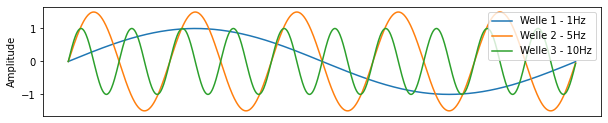

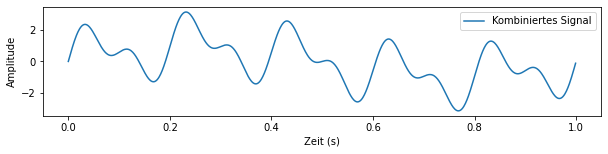

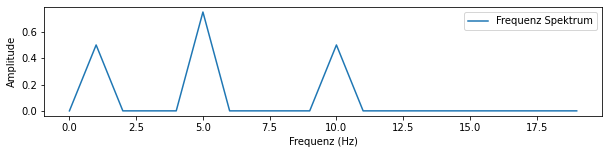

In [27]:
fig = plt.figure(figsize=(10,2))
plt.plot(t, y1, label='Welle 1 - 1Hz')
plt.plot(t, y2, label='Welle 2 - 5Hz')
plt.plot(t, y3, label='Welle 3 - 10Hz')
plt.ylabel('Amplitude')
plt.yticks([-1, 0, 1])
plt.xticks([])
plt.legend(loc='upper right')
plt.show()

fig = plt.figure(figsize=(10,2))
plt.plot(t, combined, label='Kombiniertes Signal')
plt.ylabel('Amplitude')
plt.xlabel('Zeit (s)')
plt.legend()
plt.show()

fig = plt.figure(figsize=(10,2))
plt.plot(frequncies[:20], abs(fourierTransform)[:20], label='Frequenz Spektrum')
plt.ylabel('Amplitude')
plt.xlabel('Frequenz (Hz)')
plt.legend()
plt.show()
